In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\ml_data\Amazon Sale Report.csv")

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [6]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [7]:
df.drop(['New','PendingS','index'],axis=1,inplace=True)

In [8]:
df['currency']=df['currency'].fillna(df['currency'].mode()[0])

In [9]:
df['Amount'].mean()

648.5621760909748

In [10]:
df['Amount']=df['Amount'].fillna(df['Amount'].mean())

In [11]:
df['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [12]:
df['fulfilled-by']=df['fulfilled-by'].fillna(df['fulfilled-by'].mode()[0])

In [13]:
df=df.dropna()

In [14]:
df.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [15]:
df[df.duplicated()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
167,407-3742007-3242711,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,517.000000,HYDERABAD,TELANGANA,500086.0,IN,False,Easy Ship
201,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.000000,CHANDIGARH,CHANDIGARH,160036.0,IN,False,Easy Ship
202,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.000000,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
203,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,INR,648.562176,HYDERABAD,TELANGANA,500008.0,IN,False,Easy Ship
204,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,INR,363.000000,Chennai,TAMIL NADU,600041.0,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128358,402-3963904-1085913,06-01-2022,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,L,Cancelled,0,INR,648.562176,SECUNDERABAD,TELANGANA,500025.0,IN,False,Easy Ship
128373,407-3748395-2933152,06-01-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,3XL,Shipped,1,INR,399.000000,BENGALURU,KARNATAKA,560037.0,IN,False,Easy Ship
128496,406-7346635-7865146,06-01-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,292.000000,BENGALURU,KARNATAKA,560078.0,IN,False,Easy Ship
128909,403-6757403-6097100,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,INR,648.562176,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False,Easy Ship


In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.shape

(127985, 18)

In [18]:
df['Date'][0]

'04-30-22'

In [19]:
df['month']=df['Date'].apply(lambda x:x[0:2])
df['day']=df['Date'].apply(lambda x:x[3:5])
df['year']=df['Date'].apply(lambda x:x[6:8])

In [20]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,month,day,year
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,04,30,22
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,04,30,22
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Easy Ship,04,30,22
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,04,30,22
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Easy Ship,04,30,22


In [21]:
df.drop('Date',axis=1,inplace=True)

In [22]:
df.columns

Index(['Order ID', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'month', 'day', 'year'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127985 entries, 0 to 128975
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            127985 non-null  object 
 1   Status              127985 non-null  object 
 2   Fulfilment          127985 non-null  object 
 3   Sales Channel       127985 non-null  object 
 4   ship-service-level  127985 non-null  object 
 5   Category            127985 non-null  object 
 6   Size                127985 non-null  object 
 7   Courier Status      127985 non-null  object 
 8   Qty                 127985 non-null  int64  
 9   currency            127985 non-null  object 
 10  Amount              127985 non-null  float64
 11  ship-city           127985 non-null  object 
 12  ship-state          127985 non-null  object 
 13  ship-postal-code    127985 non-null  float64
 14  ship-country        127985 non-null  object 
 15  B2B                 127985 non-nul

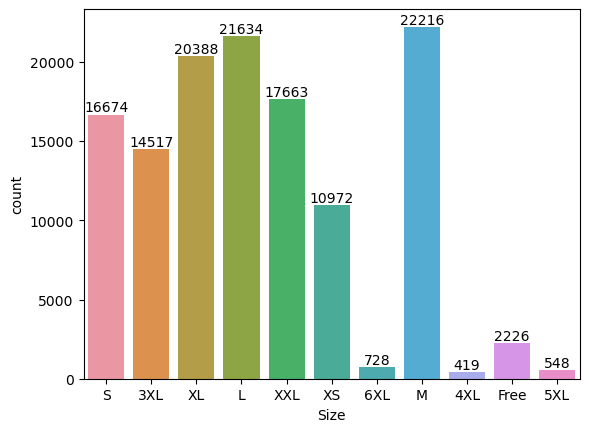

In [24]:
ax=sns.countplot(x='Size' ,data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [25]:
df['ship-state'].value_counts().sort_values(ascending=True).head(24).index

Index(['orissa', 'APO', 'AR', 'Pondicherry', 'Puducherry', 'PB', 'Rajsthan',
       'bihar', 'Mizoram', 'rajsthan', 'Punjab/Mohali/Zirakpur', 'Nagaland',
       'RJ', 'Arunachal pradesh', 'Orissa', 'NL', 'Sikkim', 'Meghalaya',
       'Rajshthan', 'Arunachal Pradesh', 'LAKSHADWEEP', 'Manipur', 'goa',
       'rajasthan'],
      dtype='object')

In [26]:
# values=['orissa', 'APO', 'AR', 'Pondicherry', 'Puducherry', 'PB', 'Rajsthan',
#         'bihar', 'Mizoram', 'rajsthan', 'Punjab/Mohali/Zirakpur', 'Nagaland',
#        'RJ', 'Arunachal pradesh', 'Orissa', 'NL', 'Sikkim', 'Meghalaya',
#        'Rajshthan', 'Arunachal Pradesh', 'LAKSHADWEEP', 'Manipur', 'goa',
#        'rajasthan']

# df=df[~df['ship-state'].str.contains('|'.join(values))]
  

In [27]:
df.groupby(['ship-state'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

,ship-state,Amount
28,MAHARASHTRA,1.400519e+07
23,KARNATAKA,1.101169e+07
57,TELANGANA,7.312626e+06
59,UTTAR PRADESH,7.241612e+06
56,TAMIL NADU,6.896729e+06
14,DELHI,4.459019e+06
24,KERALA,4.066219e+06
61,WEST BENGAL,3.750619e+06
1,ANDHRA PRADESH,3.429332e+06
19,HARYANA,3.013037e+06


In [28]:
ap=df.groupby(['ship-state'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

<Axes: xlabel='ship-state', ylabel='Amount'>

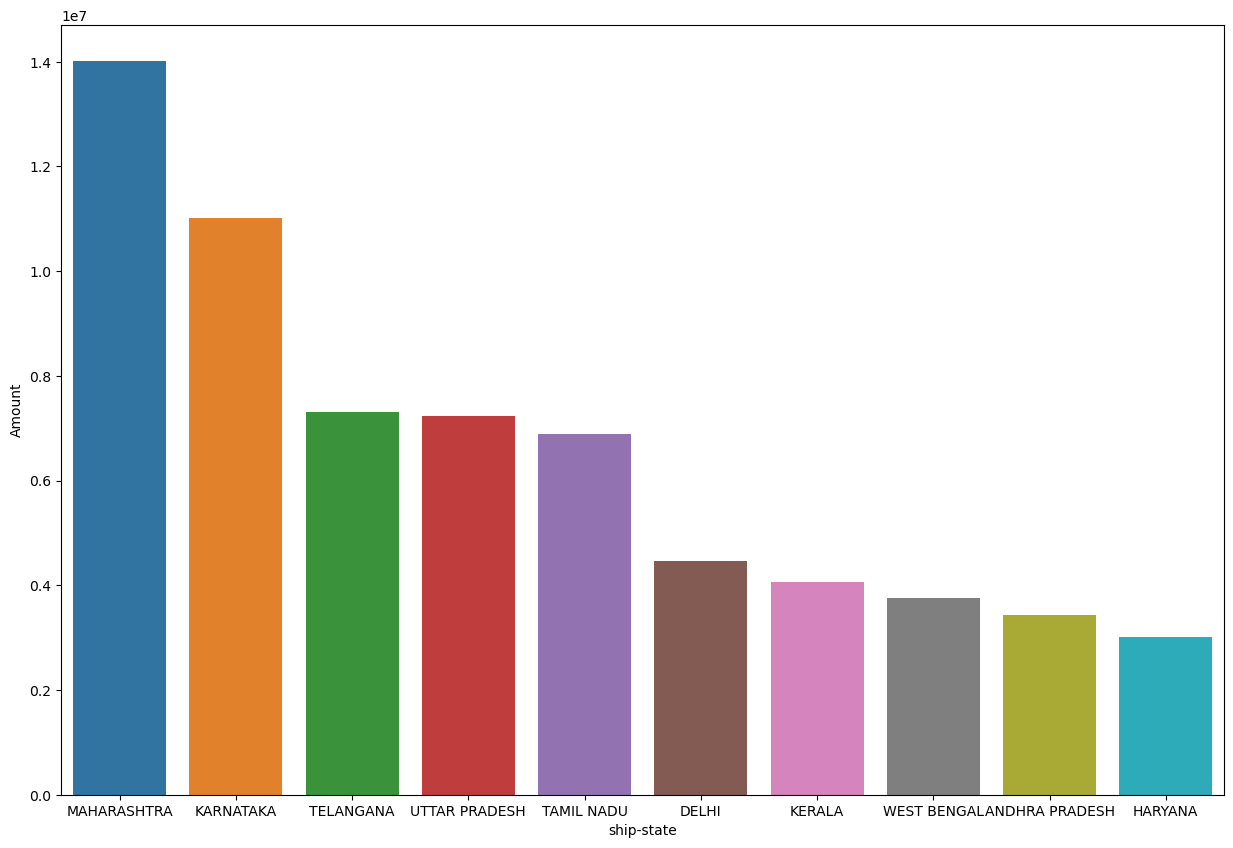

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(x='ship-state',y='Amount',data=ap)


In [30]:
# maharashtra had done ship amount

In [31]:
df.columns

Index(['Order ID', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'month', 'day', 'year'],
      dtype='object')

In [32]:
df['Qty'].value_counts().sort_values(ascending=False)

1     115061
0      12538
2        339
3         32
4          9
5          2
15         1
9          1
13         1
8          1
Name: Qty, dtype: int64

In [33]:
df.groupby(['Size'],as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

,Size,Qty
6,M,20026
5,L,19572
8,XL,18506
10,XXL,16151
7,S,14978
0,3XL,13276
9,XS,9788
4,Free,2046
3,6XL,680
2,5XL,512


<Axes: xlabel='Size', ylabel='Qty'>

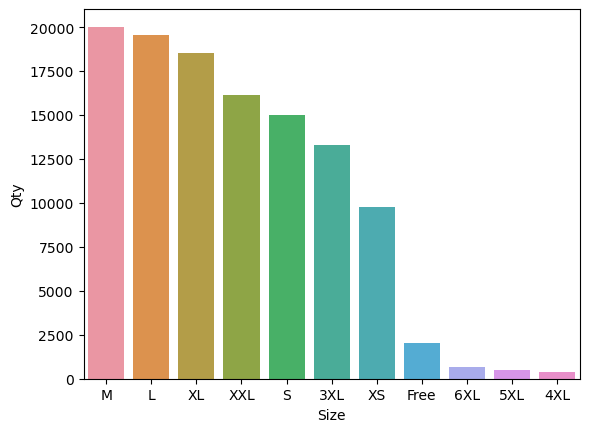

In [34]:
size_qty=df.groupby(['Size'],as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)
sns.barplot(x='Size',y='Qty',data=size_qty)

In [35]:
# Size M has large qualities than other

In [36]:
df.columns

Index(['Order ID', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'month', 'day', 'year'],
      dtype='object')

<Axes: >

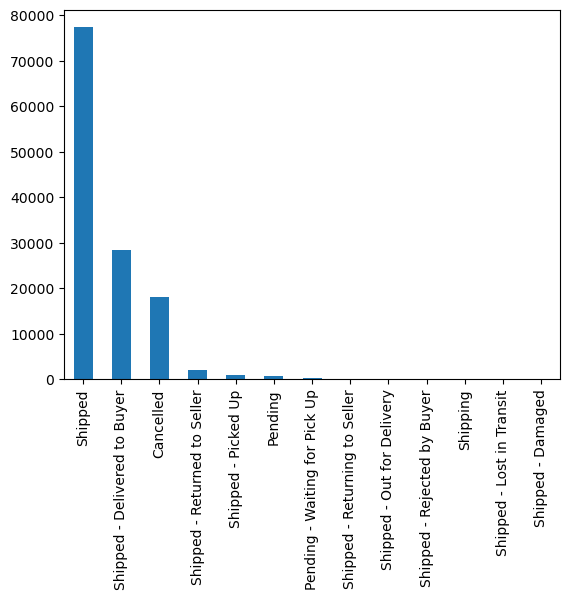

In [37]:
df['Status'].value_counts().plot(kind='bar')

In [38]:
df.columns

Index(['Order ID', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'month', 'day', 'year'],
      dtype='object')

<Axes: xlabel='Courier Status', ylabel='count'>

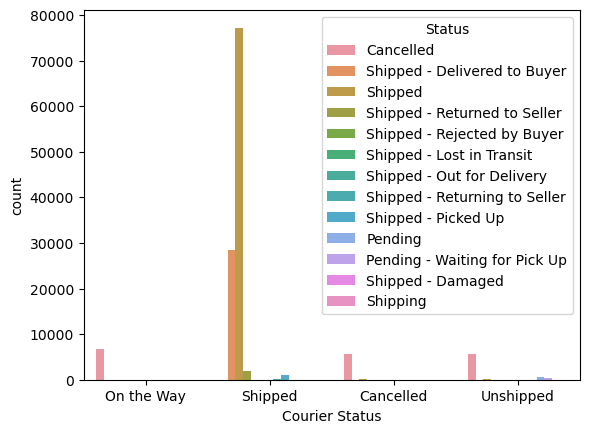

In [39]:
sns.countplot(x='Courier Status',hue='Status',data=df)

In [40]:
### From above Graph the majority of the orders are shipped through the courier.

In [41]:
df.groupby(['ship-state'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

,ship-state,Amount
28,MAHARASHTRA,1.400519e+07
23,KARNATAKA,1.101169e+07
57,TELANGANA,7.312626e+06
59,UTTAR PRADESH,7.241612e+06
56,TAMIL NADU,6.896729e+06
14,DELHI,4.459019e+06
24,KERALA,4.066219e+06
61,WEST BENGAL,3.750619e+06
1,ANDHRA PRADESH,3.429332e+06
19,HARYANA,3.013037e+06


<Axes: xlabel='ship-state', ylabel='Amount'>

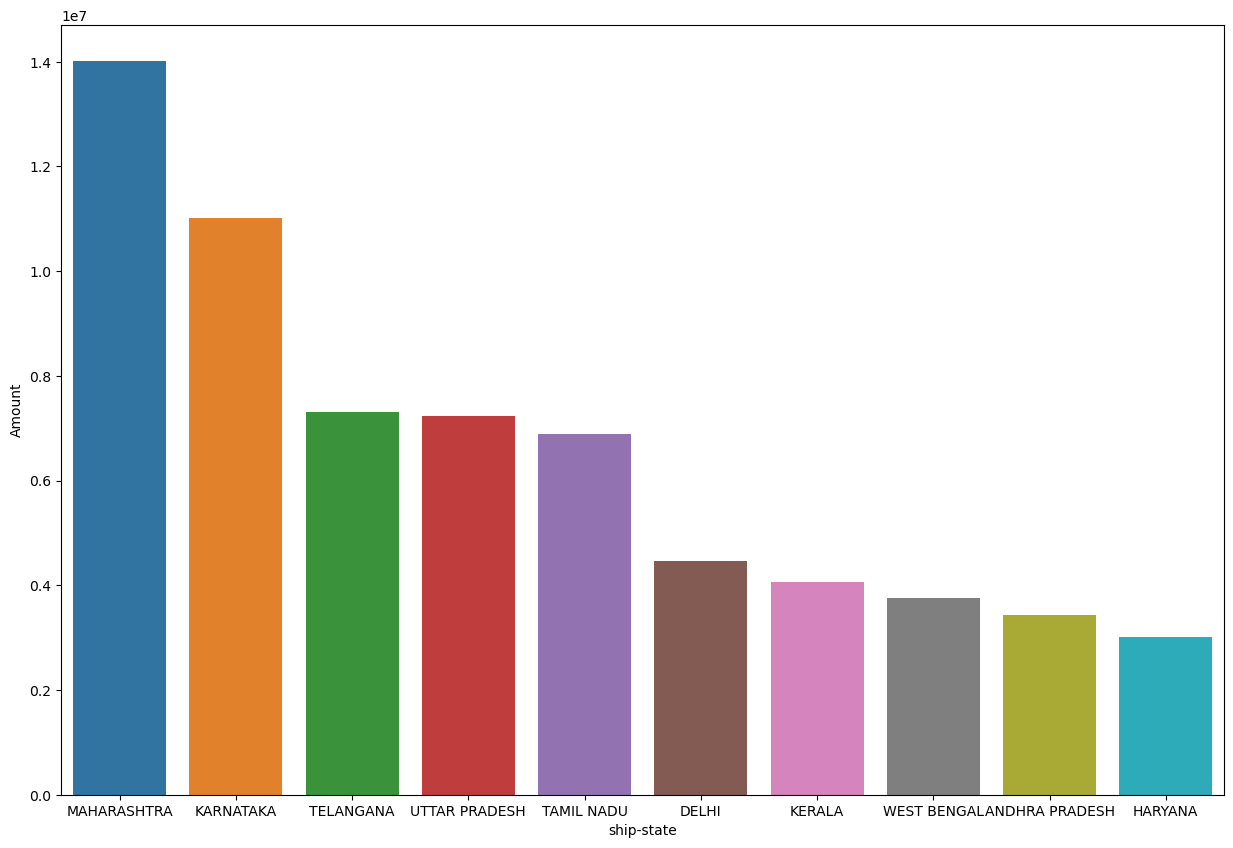

In [42]:
plt.figure(figsize=(15,10))
a=df.groupby(['ship-state'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(x='ship-state',y='Amount',data=a)

In [ ]:
## From above Graph you can see that most of the buyers are Maharashtra state

In [43]:
df.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,month,day,year
0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,04,30,22
1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,04,30,22
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Easy Ship,04,30,22
3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,04,30,22
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Easy Ship,04,30,22


In [44]:
df['Category'].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks',
       'Shoes', 'Wallet', 'Watch'], dtype=object)

In [46]:
df['Category'].value_counts()

T-shirt     50030
Shirt       49335
Blazzer     15390
Trousers    10575
Perfume      1154
Wallet        913
Socks         429
Shoes         157
Watch           2
Name: Category, dtype: int64

In [52]:
df.groupby(['Size','Category'],as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False).head(10)

,Size,Category,Qty
23,M,T-shirt,8333
16,L,Shirt,7974
31,XL,Shirt,7766
21,M,Shirt,7645
18,L,T-shirt,7368
41,XXL,Shirt,6885
33,XL,T-shirt,6842
28,S,T-shirt,6682
43,XXL,T-shirt,5588
3,3XL,T-shirt,5268


<Axes: xlabel='Size', ylabel='Qty'>

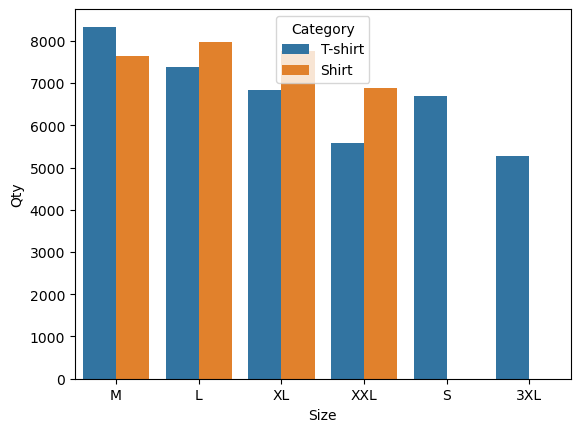

In [53]:
size_category=df.groupby(['Size','Category'],as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False).head(10)
sns.barplot(x='Size',y='Qty',hue='Category',data=size_category)

In [54]:
## M sizes T shirt purchased by most of the people

In [55]:
df.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,month,day,year
0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,04,30,22
1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,04,30,22
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Easy Ship,04,30,22
3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,04,30,22
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Easy Ship,04,30,22


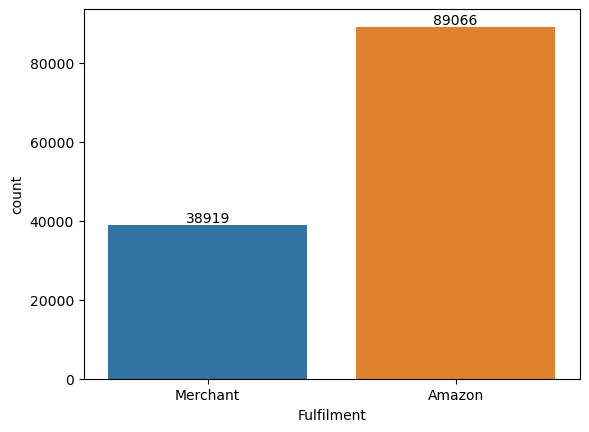

In [57]:
ax=sns.countplot(x='Fulfilment' ,data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [58]:
df.columns

Index(['Order ID', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'month', 'day', 'year'],
      dtype='object')

In [61]:
df['Order ID'].unique().shape

(120201,)

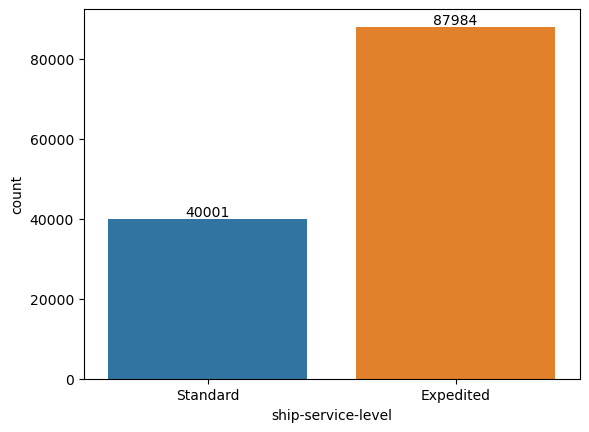

In [63]:
ax=sns.countplot(x='ship-service-level' ,data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [64]:
df['B2B'].value_counts()

False    127118
True        867
Name: B2B, dtype: int64

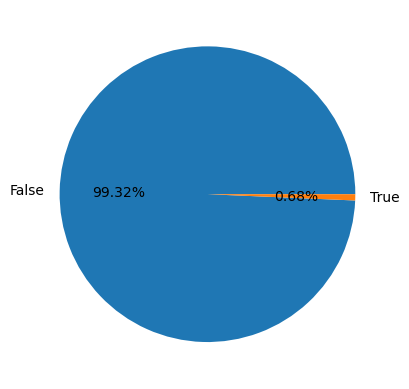

In [66]:
plt.pie(df['B2B'].value_counts(),labels=df['B2B'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [ ]:
##  From above chart we can see that maximum i.e. 99.3% of buyers are retailers and 0.7% are B2B buyers

In [67]:
df['ship-service-level'].value_counts()

Expedited    87984
Standard     40001
Name: ship-service-level, dtype: int64

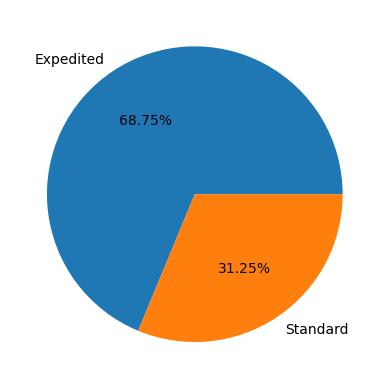

In [68]:
plt.pie(df['ship-service-level'].value_counts(),labels=df['ship-service-level'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [69]:
## most of the ship are expedited

In [70]:
df.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,month,day,year
0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,04,30,22
1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,04,30,22
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Easy Ship,04,30,22
3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,04,30,22
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Easy Ship,04,30,22


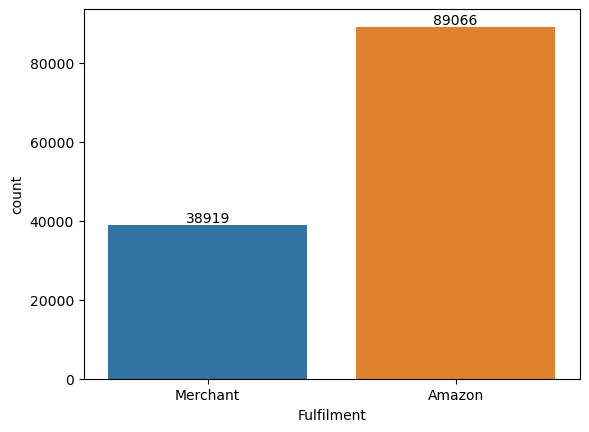

In [71]:
ax=sns.countplot(x='Fulfilment' ,data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [72]:
### Note: From above chart you can see that most of the Fulfilment are amazon

### Conclusion

### The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.